# Penyelesaian Soal LKS Tingkat Kota Malang 2023

## Importing the dependencies

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation

#### Loading the dataset

In [70]:
data = pd.read_csv('./datasets/Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv')

C:\Users\sitia\AppData\Local\Temp\ipykernel_15300\2712439271.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./datasets/Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv')


#### Checking the missing values in the dataset

In [71]:
data.isna().sum()

Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Url Product       0
Seller            0
Merchant          0
Stock             0
Item Condition    0
Filter            0
Flag              0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

Since there are no missing values in the dataset, we can skip the data cleaning step 

#### Checking the necessary columns

In [72]:
data.columns

Index(['Date', 'Last Crawling', 'SKU Name', 'Product Name', 'Url Product',
       'Seller', 'Merchant', 'Stock', 'Item Condition', 'Filter', 'Flag',
       'Bottom Price', 'Original Price', 'Discount', 'Selling Price',
       'Discrepancy', 'Sales Quantity', 'Sales Revenue'],
      dtype='object')

#### Drop the unnecessary columns

In [73]:
data = data.drop(['Date', 'Last Crawling', 'SKU Name', 'Product Name', 'Url Product', 'Seller', 'Merchant', 'Filter', 'Flag'], axis=1)
data.columns

Index(['Stock', 'Item Condition', 'Bottom Price', 'Original Price', 'Discount',
       'Selling Price', 'Discrepancy', 'Sales Quantity', 'Sales Revenue'],
      dtype='object')

## Data Exploratory

#### Checking if the dataset contains unconverted numeric values

In [74]:
data.describe()

,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32772.0,3.277200e+04,32772.000000,32772.000000,3.277200e+04
mean,155000.0,2.682624e+05,0.017166,13.306603,2.082037e+06
std,0.0,3.857990e+05,0.024959,353.210553,5.482303e+07
min,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stock           32772 non-null  object 
 1   Item Condition  32772 non-null  object 
 2   Bottom Price    32772 non-null  int64  
 3   Original Price  32772 non-null  object 
 4   Discount        32772 non-null  object 
 5   Selling Price   32772 non-null  int64  
 6   Discrepancy     32772 non-null  float64
 7   Sales Quantity  32772 non-null  int64  
 8   Sales Revenue   32772 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.3+ MB


#### Exploring the columns with `object` dtype

In [76]:
data['Original Price']

0        231000
1        218800
2        227000
3        263000
4        236000
          ...  
32767    244000
32768    212000
32769    271733
32770    210000
32771    274900
Name: Original Price, Length: 32772, dtype: object

It seems like the `Original Price` are supposed to be numeric, so we convert it to numeric

In [77]:
data['Original Price'] = pd.to_numeric(data['Original Price'], errors='coerce') # So that when the data cannot be converted to numeric, the row will be removed
data['Original Price']

0        231000.0
1        218800.0
2        227000.0
3        263000.0
4        236000.0
           ...   
32767    244000.0
32768    212000.0
32769    271733.0
32770    210000.0
32771    274900.0
Name: Original Price, Length: 32772, dtype: float64

Now that it has been converted, we can continue exploring other columns

In [78]:
data['Discount']

0        0
1        0
2        0
3        0
4        0
        ..
32767    0
32768    0
32769    0
32770    0
32771    0
Name: Discount, Length: 32772, dtype: object

It seems like the `Discount` too are supposed to be a numeric column

In [79]:
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')

We are checking if the `Discount` has unique values, so we now that it affects the `Selling Price`

In [80]:
data['Discount'].unique()

array([0.  , 0.02, 0.23, 0.2 , 0.03, 0.06, 0.08, 0.1 , 0.4 , 0.05, 0.5 ,
       0.01, 0.32, 0.09, 0.07, 0.6 , 0.11, 0.14, 0.35, 0.83, 0.17, 0.15,
       0.54, 0.18, 0.48, 0.29, 0.24, 0.53, 0.13, 0.36, 0.16, 0.62, 0.31,
       0.63,  nan, 0.12, 0.22, 0.59, 0.46])

That was interesting, now we can continue exploring the rest of the columns

In [81]:
data['Stock']

0        In Stock
1        In Stock
2        In Stock
3        In Stock
4        In Stock
           ...   
32767    In Stock
32768    In Stock
32769    In Stock
32770    In Stock
32771    In Stock
Name: Stock, Length: 32772, dtype: object

In [82]:
data['Item Condition']

0        baru
1        baru
2        baru
3        baru
4        baru
         ... 
32767    baru
32768    baru
32769    baru
32770    baru
32771    baru
Name: Item Condition, Length: 32772, dtype: object

It seems like the `Stock` cannot be used with Linear Regression because the values only ranges between "In Stock" and "Out of Stock". The `Item Condition` too does not contains unique values, so we can remove both of these columns

In [83]:
data = data.drop(['Stock', 'Item Condition'], axis=1)

In [84]:
data.isna().sum()

Bottom Price      0
Original Price    2
Discount          2
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

Since there is a missing values on the `Original Price` and `Discount`, we'll need to drop the rows that contains missing values

In [85]:
data = data.dropna()
data.isna().sum()

Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

#### Visualizing the patterns of the dataset

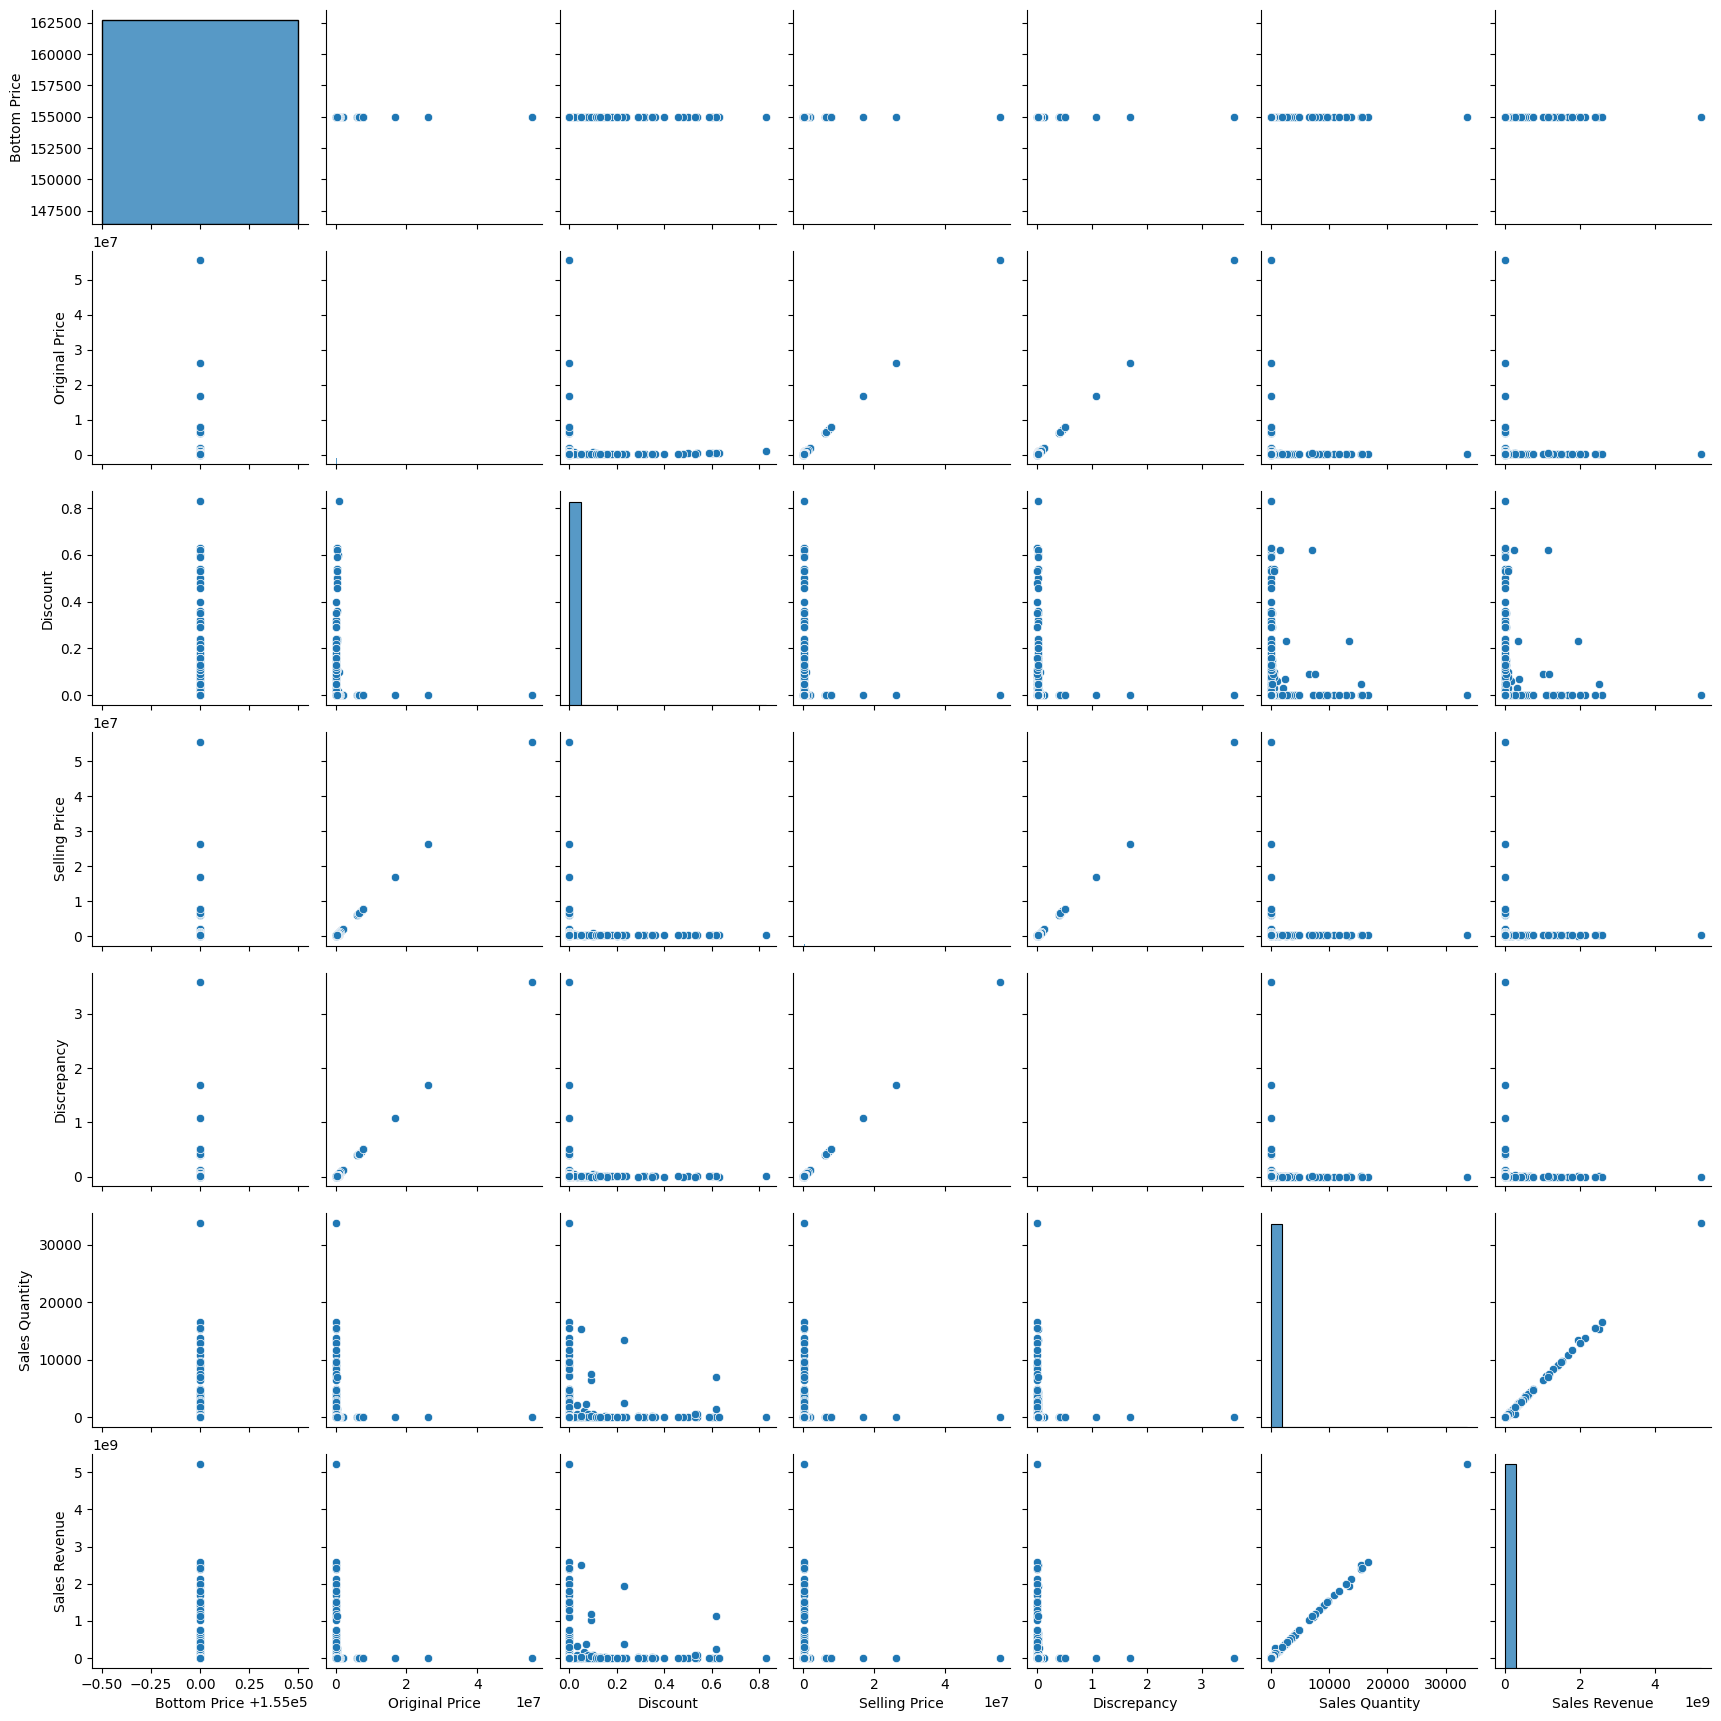

In [86]:
sns.pairplot(data)

From this data patterns visualization, we can conclude that we can only use the `Original Price` and `Discrepancy` column for predicting the `Selling Price` because they are the only columns that has a linear pattern since we are using the Linear Regression method. Now it's either the `Original Price` or `Discrepancy`

## Data Modelling
Now we're going to make the Linear Regression model. We'll use the `y = mx + b` formula

In [87]:
# Convert the Original Price to numpy array
X = np.asarray(data['Original Price'].values.tolist())
y = np.asarray(data['Selling Price'].values.tolist())

We'll visualize the graph once again to make sure

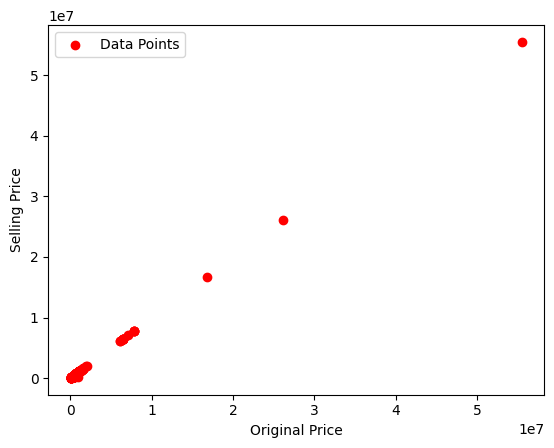

In [88]:
plt.scatter(X, y, color="red", label="Data Points")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

#### Splitting the data to training and testing data (80% and 20%)

In [89]:
def train_test_split(X: np.ndarray, y: np.ndarray, test_size=.2, random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X)) # Randomize the indices
    data_test_size = int(X.shape[0] * test_size)
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, y_train, X_test, y_test

In [90]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

#### Making the Linear Regression model

In [97]:
class LinearRegression:
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        # According to the formula: m = ((X - mean_X) * (y - mean_y)) / ((y - mean_y) ^ 2)
        mean_X = np.mean(X_train)
        mean_y = np.mean(y_train)
        
        numerator = np.sum((X_train - mean_X) * (y_train - mean_y)) # This is the ((X - mean_X) * (y - mean_y)) part
        denominator = np.sum((y_train - mean_y) ** 2) # This is the ((y - mean_y) ^ 2) part
        
        self.m = numerator / denominator
        self.b = mean_y - (self.m * mean_X)
    
    def predict(self, X_test):
        # To predict a y value: mx + b
        return self.b + self.m * X_test
    
    def mean_absolute_percentage_error(self, y_pred, y_true):
        # The MAPE formula: (| A - F / A |) / n
        mape = np.mean(np.abs((y_true - y_pred) / y_true))
        return mape * 100 # Multiply the value with 100 to get the percentage

Now that we have the training and testing data, we can use it with the model

In [98]:
model = LinearRegression() # Initialize the model

In [99]:
model.fit(X_train, y_train) # Fitting the model with the training data

The model is now trained, we can use it to predict data

In [100]:
predictions = model.predict(X_test) # Predict the testing data

Take a look at the predictions

In [101]:
predictions

array([298795.81539585, 211805.5962483 , 232803.23535288, ...,
       168110.50915925, 216805.03413035, 224804.13474161])

## Evaluating the model
We can use the MAPE (Mean Absolute Percentage Error) function that we made earlier in the model to show the accuracy of the model's predictions

In [103]:
mape = model.mean_absolute_percentage_error(predictions, y_test) # Comparing the predictions and the actual value of the y_test
print(f"The MAPE: {mape:.3f}%")

The MAPE: 0.194%


As we can see, the error of the model only reaches the value of 0.1%, indicating that the model predictions is very accurate